In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("fashion-mnist_train.csv")
test_df = pd.read_csv("fashion-mnist_test.csv")

In [3]:
print(train_df.shape, test_df.shape)

(60000, 785) (10000, 785)


In [4]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [5]:
train_df["label"].unique().shape

(10,)

Dataset contains 10 classes

In [6]:
x_train = train_df.copy()
x_train.drop(columns="label", inplace=True)
x_train = x_train.to_numpy()
x_train = x_train.reshape([-1,28,28,1])     
# -1 for all the images
# (28, 28) bec mnist contains image of that size
y_train = train_df["label"].to_numpy()

x_test = test_df.copy()
x_test.drop(columns="label", inplace=True)
x_test = x_test.to_numpy()
x_test = x_test.reshape([-1,28,28,1])
y_test = test_df["label"].to_numpy()

In [7]:
y_train

array([2, 9, 6, ..., 8, 8, 7], dtype=int64)

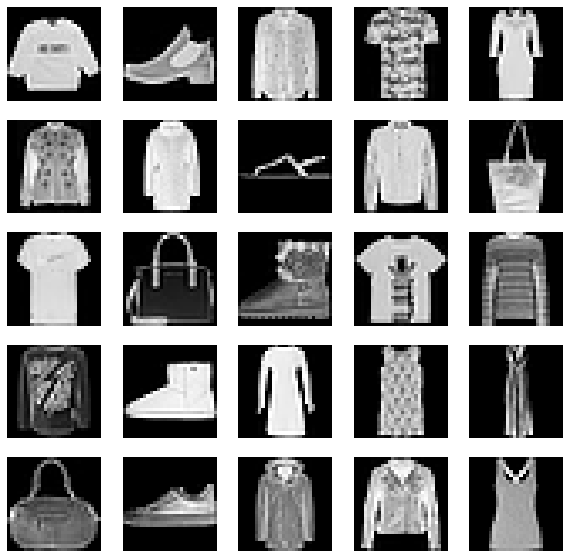

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.axis("off")
plt.show()

In [9]:
x_train[2].max()

255

## normalize

In [10]:
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train[2].max()

1.0

# Model building

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout

In [12]:
model = Sequential()

model.add(Conv2D(input_shape=(28,28,1), filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=64, activation="relu"))
model.add(Dense(activation="softmax", units=10))    # softmax bec multiclass classifier, 10 bec we have 10 classses

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 64)                692288    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 693,578
Trainable params: 693,578
Non-trainable params: 0
__________________________________________________

In [14]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [15]:
hist = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 33s 19ms/step - loss: 0.4129 - accuracy: 0.8537 - val_loss: 0.3107 - val_accuracy: 0.8875
Epoch 2/10
1688/1688 [==============================] - 32s 19ms/step - loss: 0.2772 - accuracy: 0.9004 - val_loss: 0.2823 - val_accuracy: 0.8960
Epoch 3/10
1688/1688 [==============================] - 34s 20ms/step - loss: 0.2345 - accuracy: 0.9150 - val_loss: 0.2677 - val_accuracy: 0.9037
Epoch 4/10
1688/1688 [==============================] - 35s 21ms/step - loss: 0.2033 - accuracy: 0.9252 - val_loss: 0.2540 - val_accuracy: 0.9110
Epoch 5/10
1688/1688 [==============================] - 33s 20ms/step - loss: 0.1792 - accuracy: 0.9348 - val_loss: 0.2456 - val_accuracy: 0.9138
Epoch 6/10
1688/1688 [==============================] - 34s 20ms/step - loss: 0.1547 - accuracy: 0.9439 - val_loss: 0.2736 - val_accuracy: 0.9083
Epoch 7/10
1688/1688 [==============================] - 34s 20ms/step - loss: 0.1388 - accuracy: 0.9488 - val_loss: 0.2750 -

In [16]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2887 - accuracy: 0.9166


[0.2887454330921173, 0.9165999889373779]

In [19]:
y_pred = model.predict(x_test)